# Handwritten Digits Classification Using the MNIST Data Set

In [1]:
# Import modules for splitting our data
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# Import some classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Import modules for metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # New in version 0.24.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import string
import os

In [2]:
# Set the random seed so we will have reproducibility.
seed = 43

# Tell Pandas we want to see all the columns.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) # The time column still wraps.

## Load the MNIST Data from CSV files

In [3]:
def LoadFullMNISTDataCVS():
    dftrain = pd.read_csv(os.path.normpath("../Data/MNIST/mnist_train_12000.csv"))
    dftest = pd.read_csv(os.path.normpath("../Data/MNIST/mnist_test_2000.csv"))
    
    y_train = dftrain['label']
    X_train = dftrain.drop('label', axis = 1)
    X_train = np.array(X_train)
                        
    y_test = dftest['label']
    X_test = dftest.drop('label', axis = 1)
    X_test = np.array(X_test)
     
    numbers_string = string.digits
    numbers_list = list(numbers_string)
    #print(numbers_list)
    # ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    # Show the first image
    image = X_train[0].reshape(28,28)
    plt.imshow(image)
   
    plt.imshow(image, cmap='gray_r')
    plt.axis('off')
    plt.title(y_train[0])
    
    n_samples = len(dftrain.index)
    images = X_train.reshape(n_samples,28,28)
    # On affiche les 50 premiers :
    
    # Show the first 50 images
    plt.figure(figsize=(10,20))
    for i in range(0,49) :
        plt.subplot(10,5,i+1)
        plt.axis('off')
        plt.imshow(images[i], cmap="gray_r")
        plt.title(y_train[i])

    return X_train, y_train, X_test, y_test, numbers_list

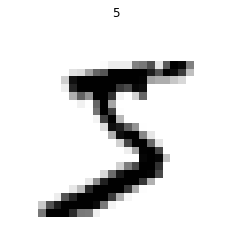

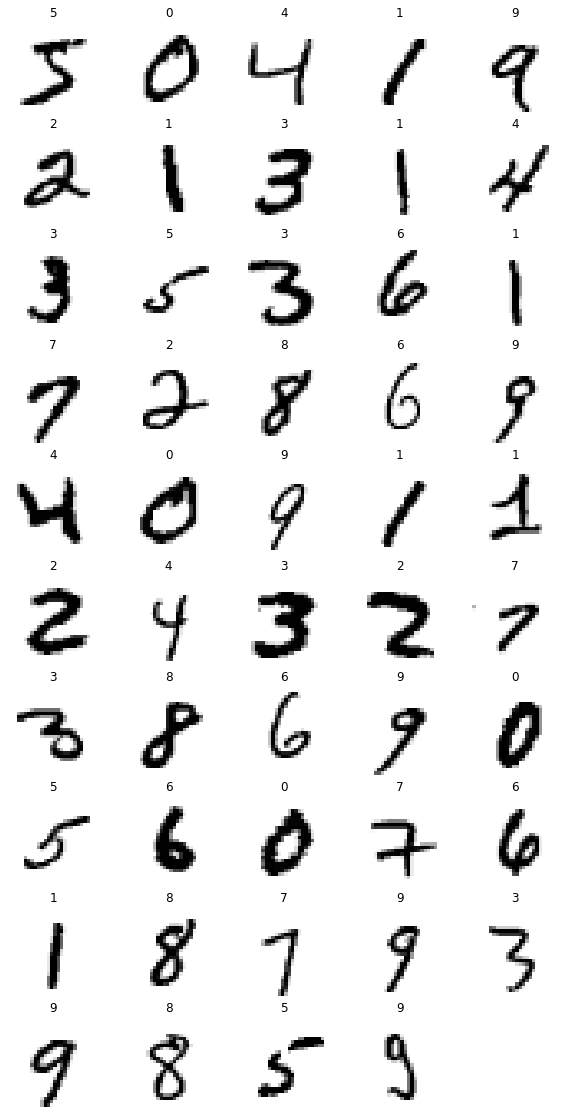

In [4]:
X_train, y_train, X_test, y_test, numbers_list = LoadFullMNISTDataCVS()

## Define a function to make it easy to calculate and re-calculate metrics

In [5]:
def CalculateMetrics(y_test, y_pred, classes):
    # Calculate mymetrics
    acc = metrics.accuracy_score(y_test, y_pred) * 100
    print("\nTesting Accuracy on Test Set: {:.3f} %".format(acc))

    cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)

    # target_names: ['0','1','2','3','4','5','6','7','8','9']
    print(metrics.classification_report(y_test, y_pred, target_names=classes.astype(str), digits=5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = classes)
    
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

# Multi-layer Perceptron


Testing Accuracy on Test Set: 90.750 %
              precision    recall  f1-score   support

           0    0.90860   0.96571   0.93629       175
           1    0.97034   0.97863   0.97447       234
           2    0.93689   0.88128   0.90824       219
           3    0.88182   0.93720   0.90867       207
           4    0.94231   0.90323   0.92235       217
           5    0.94268   0.82682   0.88095       179
           6    0.88889   0.94382   0.91553       178
           7    0.90155   0.84878   0.87437       205
           8    0.80734   0.91667   0.85854       192
           9    0.89840   0.86598   0.88189       194

    accuracy                        0.90750      2000
   macro avg    0.90788   0.90681   0.90613      2000
weighted avg    0.90967   0.90750   0.90743      2000



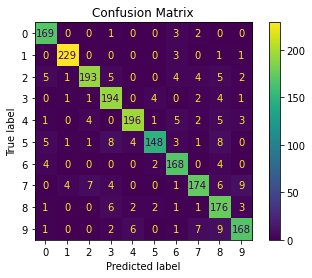

In [7]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
CalculateMetrics(y_test, y_pred, mlp.classes_)

## Create a bagging classifiers with decision trees as base classifiers

In [8]:
# Create a base classifier
base_cls = DecisionTreeClassifier(random_state = seed)

# Number of base classifiers
num_trees = 10

# We will use cross validation which wants all the data
X = np.append(X_train, X_test, axis=0)
y = np.append(y_train, y_test, axis=0)

# Stratified K-Fold Cross Validation, 3 splits with shuffling
kfold = model_selection.StratifiedKFold(n_splits = 3, shuffle=True, 
                                         random_state = seed)
# Instantiate a Bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)

startTime = time.time()
results = model_selection.cross_val_score(model, X, y, cv = kfold)

print("Accuracy :")
print(results)
print("\tAverage: {}".format(results.mean()))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Elapsed Time
time_elapsed = time.time() - startTime
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Accuracy :
[0.88879366 0.90979216 0.90720103]
	Average: 0.9019289480057652
Training complete in 1m 13s



Testing Accuracy on Test Set: 87.450 %
              precision    recall  f1-score   support

           0    0.87817   0.98857   0.93011       175
           1    0.95436   0.98291   0.96842       234
           2    0.84615   0.85388   0.85000       219
           3    0.83415   0.82609   0.83010       207
           4    0.89302   0.88479   0.88889       217
           5    0.86813   0.88268   0.87535       179
           6    0.86339   0.88764   0.87535       178
           7    0.88384   0.85366   0.86849       205
           8    0.85030   0.73958   0.79109       192
           9    0.85340   0.84021   0.84675       194

    accuracy                        0.87450      2000
   macro avg    0.87249   0.87400   0.87245      2000
weighted avg    0.87392   0.87450   0.87347      2000



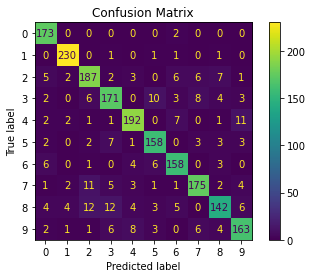

In [9]:
CalculateMetrics(y_test, y_pred, model.classes_)

## <span style="color:red">Return to the presentation</span>

## Class Assignment: Add Stacking and Compare Results

## Save and load a model using Pickle

In [10]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([7, 6, 1, ..., 3, 9, 3], dtype=int64)